In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras import backend as K

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

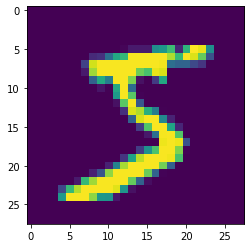

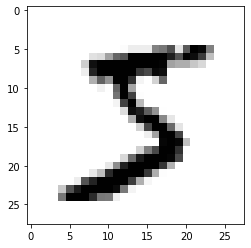

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
print("Training Samples dimension",x_train.shape)
print("Testing Samples dimension",x_test.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


In [8]:
import keras

In [9]:
batch_size = 128
num_classes = 10
epochs = 10

# conversion of class vectors to matrices of  binary class 
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [12]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [13]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the bot as mnist.h5")

Epoch 1/10
469/469 [==============================] - 53s 112ms/step - loss: 2.2857 - accuracy: 0.1496 - val_loss: 2.2542 - val_accuracy: 0.3622
Epoch 2/10
469/469 [==============================] - 55s 117ms/step - loss: 2.2342 - accuracy: 0.2830 - val_loss: 2.1924 - val_accuracy: 0.5771
Epoch 3/10
469/469 [==============================] - 60s 128ms/step - loss: 2.1685 - accuracy: 0.4036 - val_loss: 2.1072 - val_accuracy: 0.6315
Epoch 4/10
469/469 [==============================] - 61s 130ms/step - loss: 2.0736 - accuracy: 0.4971 - val_loss: 1.9825 - val_accuracy: 0.6718
Epoch 5/10
469/469 [==============================] - 61s 129ms/step - loss: 1.9368 - accuracy: 0.5594 - val_loss: 1.8022 - val_accuracy: 0.7082
Epoch 6/10
469/469 [==============================] - 60s 127ms/step - loss: 1.7491 - accuracy: 0.6065 - val_loss: 1.5650 - val_accuracy: 0.7451
Epoch 7/10
469/469 [==============================] - 60s 129ms/step - loss: 1.5214 - accuracy: 0.6434 - val_loss: 1.3007 - val_ac

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7625483870506287
Test accuracy: 0.8271999955177307


In [20]:
import numpy as np

In [21]:
predictions=model.predict([x_test])

313/313 [==============================] - 3s 9ms/step


In [22]:
print(predictions)

[[9.4423732e-03 3.5056334e-03 8.2289418e-03 ... 8.5673451e-01
  2.7961882e-02 3.8628913e-02]
 [4.4021875e-02 1.7212445e-02 5.0404865e-01 ... 1.8190990e-03
  9.4436020e-02 5.4453295e-03]
 [9.3795909e-03 7.4208409e-01 3.2846618e-02 ... 4.0290531e-02
  5.0602589e-02 2.7386086e-02]
 ...
 [3.2169856e-03 1.0818692e-02 6.3792155e-03 ... 1.2773581e-01
  1.3397785e-01 2.9222259e-01]
 [4.9718000e-02 6.6888750e-02 2.4824195e-02 ... 7.9564393e-02
  2.8347430e-01 1.0523403e-01]
 [5.4100156e-02 1.7995473e-04 3.7457809e-02 ... 9.0497837e-04
  4.0169302e-03 5.3030634e-03]]


In [23]:
print(np.argmax(predictions[0]))

7


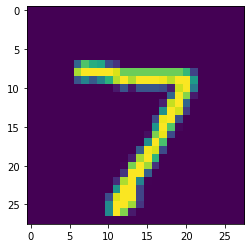

In [24]:
plt.imshow(x_test[0])

In [25]:
print(np.argmax(predictions[128]))

8


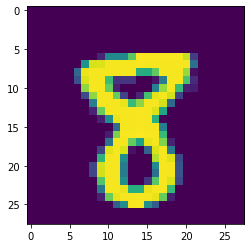

In [26]:
plt.imshow(x_test[128])

In [78]:
# Predict using uploaded images
import cv2
import matplotlib.pyplot as plt

In [81]:
img=cv2.imread("C:/Users/Acer/two.png")
if img is not None:
    print(img.shape)
else:
    print("Error loading the image.")

(313, 260, 3)


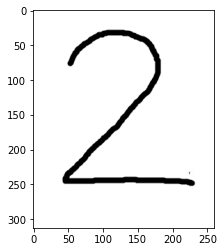

In [82]:
plt.imshow(img)

In [83]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [84]:
gray.shape

(313, 260)

In [85]:
resized=cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [86]:
resized.shape

(28, 28)

In [87]:
import tensorflow as tf
newing=tf.keras.utils.normalize(resized,axis=1)

In [88]:
newing=np.array(newing).reshape(-1,28,28,1)

In [89]:
newing.shape

(1, 28, 28, 1)

In [90]:
predictions=model.predict(newing)

1/1 [==============================] - 0s 32ms/step


In [91]:
print(np.argmax(predictions))

2
